## ***Overview:***
Machine learning regression is of critical importance in the delivery supply chain domain. It makes it possible to predict several essential aspects of this complex process. Firstly, it can be used to anticipate potential delays during delivery. By analyzing various factors such as incidents, weather conditions, traffic jams, delays at fulfillment centers, and even historical traffic patterns, regression can provide accurate predictions about delivery times, allowing businesses to better plan their operations.
As well as it makes it possible to predict good quality, cost and risk of loss.

## ***About Dataset***
This dataset contains popular warehouse leasing from Kaggle, with below columns:

*  Address
*  BuildingSize
*  Price
*  PropType
*  SpaceAvailable
*  SpaceClass


Data source: https://www.kaggle.com/datasets/snuzbrokh/warehouse-lease-data?select=data_cleaned.csv

# Data understanding

In [ ]:
#Importing libraries
import numpy as np  # Imports the NumPy library for numerical calculations
import pandas as pd  # Imports the Pandas library for tabular data manipulation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Data import
Warehouses = pd.read_csv("/content/gdrive/My Drive/Stage Smart DLSP/Warehouses Data.csv" , encoding='latin-1',  sep=";")

In [ ]:
#Display the first 4 rows of the DataFrame
Warehouses.head(4)

,Ref Warehouse,address,buildingSize,city,price,propType,spaceAvailable,spaces,ceilingHeight,Region,retard,spaceClass,vol,perte,degré de perte,Systèmes de sécurité,yearBuilt,yearRenovated,Disponibilité,Incident
0,War1,"11907 General Dr Charlotte, NC",243072.0,Charlotte,0.440,Industrial,243072,1,16,South,15,large,Vols d'opportunité,Pertes de marchandises,1,0,2020.0,2020.0,Disponible à la commande,0
1,War2,"1427 Boulder Ct Greensboro, NC",23000.0,Greensboro,0.665,Industrial,21000,4,16,South,16,small,Vols internes,Pertes financières,2,0,1995.0,1995.0,Disponible à la commande,1
2,War3,"819 Baker Rd High Point, NC",19764.0,High Point,0.310,Industrial,19764,1,16,South,17,small,Vols externes,Pertes opérationnelles,3,0,1977.0,1977.0,Disponible à la commande,0
3,War4,"2829 Rosemont Dr Charlotte, NC",3600.0,Charlotte,0.630,Industrial,3600,1,16,South,18,small,Vols organisés,Pertes de productivité,1,0,1968.0,1968.0,Disponible à la commande,1


In [ ]:
#Dimensions of the DataFrame
Warehouses.shape

(8643, 20)

# Exploratory data analysis

In [ ]:
import seaborn as sns

<Axes: xlabel='Disponibilité', ylabel='count'>

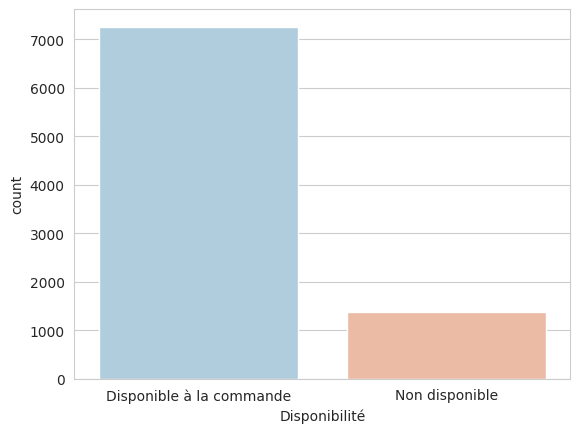

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Disponibilité', data=Warehouses, palette='RdBu_r')

<Axes: xlabel='Disponibilité', ylabel='count'>

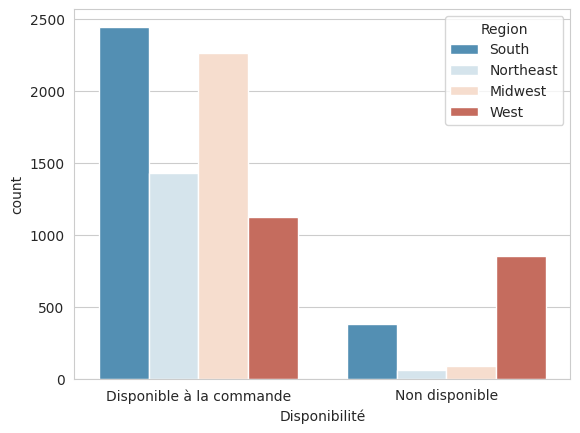

In [ ]:
sns.countplot(x='Disponibilité',hue='Region', data=Warehouses, palette='RdBu_r')

<Axes: xlabel='Disponibilité', ylabel='count'>

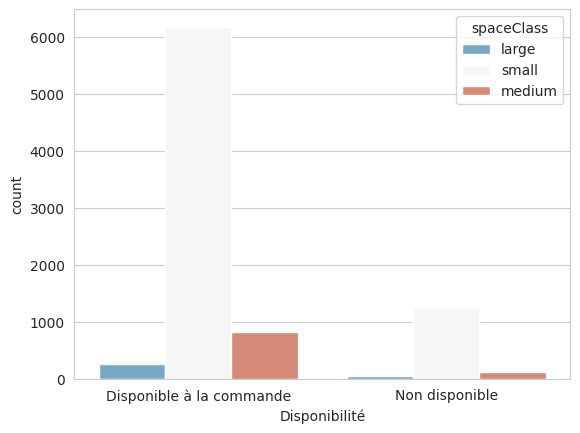

In [ ]:
sns.countplot(x='Disponibilité',hue='spaceClass', data=Warehouses, palette='RdBu_r')

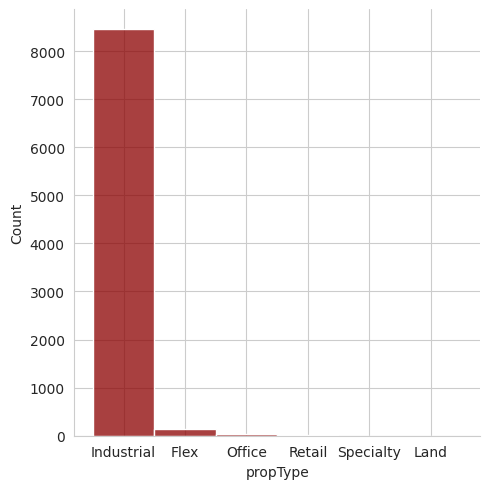

In [ ]:
sns.displot(Warehouses['propType'], kde=False, color='darkred', bins=30)

In [ ]:
Warehouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8643 entries, 0 to 8642
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ref Warehouse         8643 non-null   object 
 1   address               8643 non-null   object 
 2   buildingSize          8642 non-null   float64
 3   city                  8643 non-null   object 
 4   price                 8643 non-null   float64
 5   propType              8643 non-null   object 
 6   spaceAvailable        8643 non-null   int64  
 7   spaces                8643 non-null   int64  
 8   ceilingHeight         8643 non-null   int64  
 9   Region                8643 non-null   object 
 10  retard                8643 non-null   int64  
 11  spaceClass            8643 non-null   object 
 12  vol                   8643 non-null   object 
 13  perte                 8643 non-null   object 
 14  degré de perte        8643 non-null   int64  
 15  Systèmes de sécurité 

<Axes: >

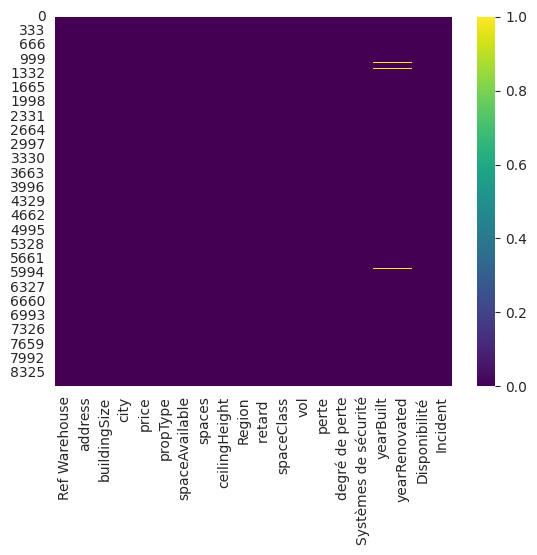

In [ ]:
sns.heatmap(Warehouses.isnull(), cmap='viridis')

# Data Pre-processing


**Train Test split**

In [ ]:
#Imports the train_test_split function from scikit-learn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
#Splitting the Data into Training and Test Sets
trainset, testset = train_test_split(Warehouses, test_size=0.2, random_state=0)

In [ ]:
#The distribution of values in that column
trainset['spaceClass'].value_counts()

small     5927
medium     746
large      241
Name: spaceClass, dtype: int64

In [ ]:
testset['spaceClass'].value_counts()

small     1481
medium     185
large       63
Name: spaceClass, dtype: int64

**Converting Categorial Features**

In [ ]:
dummies1 = pd.get_dummies(Warehouses['Disponibilité'])
dummies1 = dummies1.iloc[:, :-1]
dummies1

,Disponible à la commande
0,1
1,1
2,1
3,1
4,1
...,...
8638,0
8639,0
8640,0
8641,0


In [ ]:
dummies2= pd.get_dummies(Warehouses['spaceClass'], drop_first=True)
dummies2

,medium,small
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8638,0,1
8639,0,1
8640,0,1
8641,1,0


In [ ]:
dummies3= pd.get_dummies(Warehouses['propType'], drop_first=True)
dummies3

,Industrial,Land,Office,Retail,Specialty
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8638,1,0,0,0,0
8639,1,0,0,0,0
8640,1,0,0,0,0
8641,1,0,0,0,0


In [ ]:
dummies4= pd.get_dummies(Warehouses['Region'], drop_first=True)
dummies4

,Northeast,South,West
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
8638,0,1,0
8639,0,1,0
8640,0,1,0
8641,0,1,0


In [ ]:
Warehouses.drop(['Ref Warehouse','Disponibilité','address','city','vol','perte','propType','spaceClass','Region'], axis=1, inplace=True)

In [ ]:
Warehouses.head()

,buildingSize,price,spaceAvailable,spaces,ceilingHeight,retard,degré de perte,Systèmes de sécurité,yearBuilt,yearRenovated,Incident
0,243072.0,0.440,243072,1,16,15,1,0,2020.0,2020.0,0
1,23000.0,0.665,21000,4,16,16,2,0,1995.0,1995.0,1
2,19764.0,0.310,19764,1,16,17,3,0,1977.0,1977.0,0
3,3600.0,0.630,3600,1,16,18,1,0,1968.0,1968.0,1
4,18000.0,1.500,18000,2,16,19,1,0,1943.0,1943.0,0


In [ ]:
Warehouses= pd.concat([Warehouses, dummies1, dummies2, dummies3, dummies4], axis=1)

In [ ]:
Warehouses.head()

,buildingSize,price,spaceAvailable,spaces,ceilingHeight,retard,degré de perte,Systèmes de sécurité,yearBuilt,yearRenovated,...,medium,small,Industrial,Land,Office,Retail,Specialty,Northeast,South,West
0,243072.0,0.440,243072,1,16,15,1,0,2020.0,2020.0,...,0,0,1,0,0,0,0,0,1,0
1,23000.0,0.665,21000,4,16,16,2,0,1995.0,1995.0,...,0,1,1,0,0,0,0,0,1,0
2,19764.0,0.310,19764,1,16,17,3,0,1977.0,1977.0,...,0,1,1,0,0,0,0,0,1,0
3,3600.0,0.630,3600,1,16,18,1,0,1968.0,1968.0,...,0,1,1,0,0,0,0,0,1,0
4,18000.0,1.500,18000,2,16,19,1,0,1943.0,1943.0,...,0,1,1,0,0,0,0,1,0,0


**Nettoyage**

In [ ]:
#To fill missing (NaN) values in the DataFrame with the value 0
Warehouses.fillna(0, inplace=True)

<Axes: >

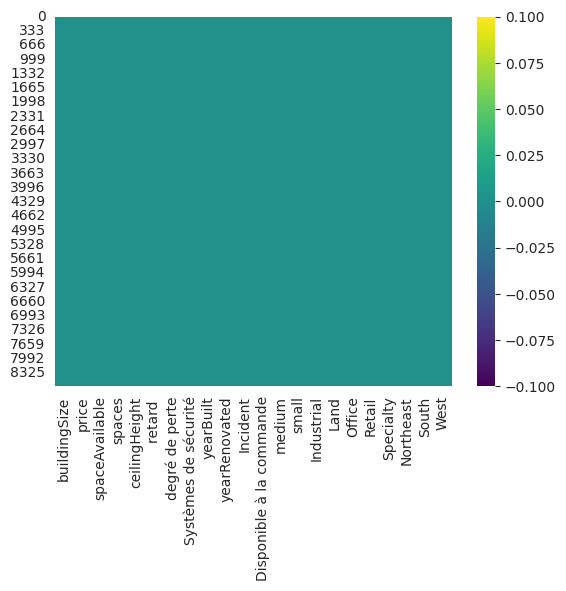

In [ ]:
sns.heatmap(Warehouses.isnull(), cmap='viridis')

In [ ]:
Warehouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8643 entries, 0 to 8642
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buildingSize              8643 non-null   float64
 1   price                     8643 non-null   float64
 2   spaceAvailable            8643 non-null   int64  
 3   spaces                    8643 non-null   int64  
 4   ceilingHeight             8643 non-null   int64  
 5   retard                    8643 non-null   int64  
 6   degré de perte            8643 non-null   int64  
 7   Systèmes de sécurité      8643 non-null   int64  
 8   yearBuilt                 8643 non-null   float64
 9   yearRenovated             8643 non-null   float64
 10  Incident                  8643 non-null   int64  
 11  Disponible à la commande  8643 non-null   uint8  
 12  medium                    8643 non-null   uint8  
 13  small                     8643 non-null   uint8  
 14  Industri

# Modelisation & Evaluation

**Regression**



> Regression linéaire simple



**Prediction du risque de perte**

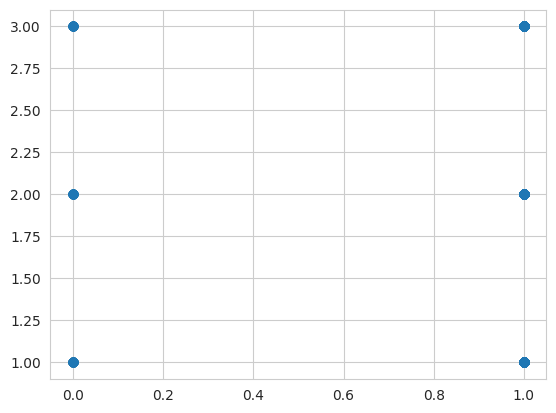

In [ ]:
#Import the matplotlib library for data visualization
import matplotlib.pyplot as plt
#Create a scatter plot to visualize the relationship between 'propType' and 'degré de perte'
plt.scatter(Warehouses['Industrial'], Warehouses['degré de perte'])

In [ ]:
#Import the LinearRegression class from the linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
X = Warehouses[['Industrial']]  #feature
y = Warehouses['degré de perte']  #target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
len(X_test)

1729

In [ ]:
len(X_train)

6914

In [ ]:
len(X)

8643

In [ ]:
#Building the model
model = LinearRegression()

In [ ]:
#Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_pred

array([1.96462404, 1.96462404, 1.96462404, ..., 1.96462404, 1.96462404,
       1.96462404])

In [ ]:
y_test

5598    2
5775    2
222     1
4828    3
318     1
       ..
7255    3
5013    2
491     1
2344    3
5867    1
Name: degré de perte, Length: 1729, dtype: int64

In [ ]:
#The Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error (MSE):{mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean Squared Error (MSE):0.838 (42.7%)


In [ ]:
score= model.score(X_train, y_train)
print('Model determination:', score)

Model determination: 0.0003150279907224718


In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination (R2) :", r2)


Coefficient of determination (R2) : -0.0021980670852685957


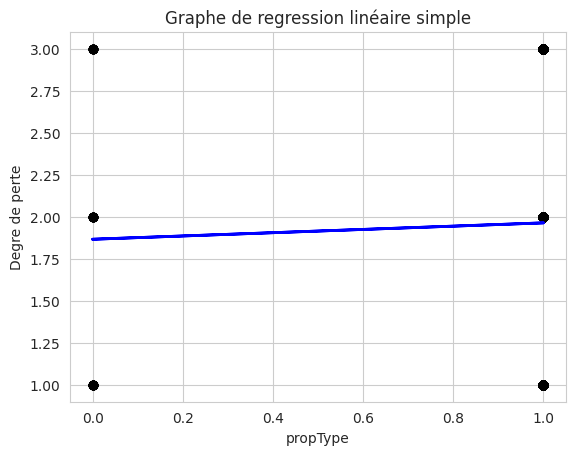

In [ ]:
#Display the results
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_train, model.predict(X_train), color='blue', linewidth=2)
plt.title('Graphe de regression linéaire simple')
plt.xlabel('propType')
plt.ylabel('Degre de perte')
plt.show()

**Prediction de coûts**

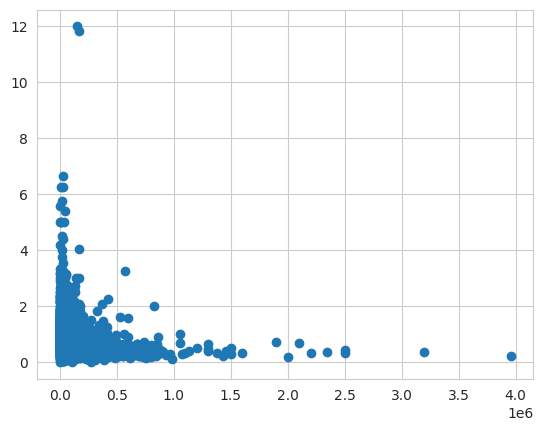

In [ ]:
#Create a scatter plot to visualize the relationship between 'buildingSize' and 'price'
plt.scatter(Warehouses['buildingSize'], Warehouses['price'])

In [ ]:
X = Warehouses[['buildingSize']]  #feature
y = Warehouses['price']  #target

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Building the model
model = LinearRegression()
#Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_pred

array([0.78987439, 0.75614888, 0.78678803, ..., 0.77228381, 0.79037326,
       0.76999766])

In [ ]:
y_test

5598    0.460
5775    0.845
222     1.920
4828    0.940
318     0.790
        ...  
7255    1.000
5013    0.565
491     0.330
2344    1.000
5867    0.580
Name: price, Length: 1729, dtype: float64

In [ ]:
#The Mean Squared Error (MSE)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error (MSE):{mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean Squared Error (MSE):0.509 (67.2%)


In [ ]:
score= model.score(X_train, y_train)
print('Model determination:', score)

Model determination: 0.024996697942261448


In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R2) :", r2)

Coefficient de détermination (R2) : 0.022228655159083788


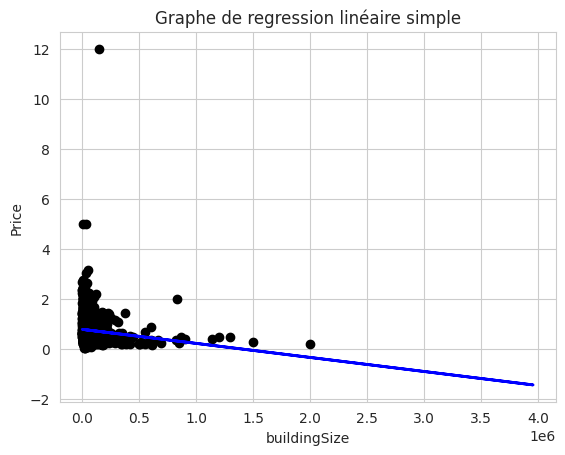

In [ ]:
#Display the results
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_train, model.predict(X_train), color='blue', linewidth=2)
plt.title('Graphe de regression linéaire simple')
plt.xlabel('buildingSize')
plt.ylabel('Price')
plt.show()

**Prediction du risque de retard**

In [ ]:
Warehouses.columns = Warehouses.columns.str.strip()  #Remove white spaces from column names

In [ ]:
Warehouses['retard']

0       15
1       16
2       17
3       18
4       19
        ..
8638    65
8639    66
8640    67
8641    68
8642    69
Name: retard, Length: 8643, dtype: int64

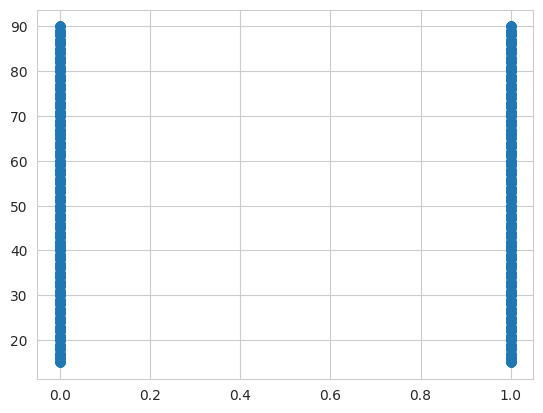

In [ ]:
#Create a scatter plot to visualize the relationship between 'Incident' and 'retard
plt.scatter(Warehouses['Incident'], Warehouses['retard'])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = Warehouses[['Incident']]  #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Building the model
model = LinearRegression()
#Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_pred

array([52.34182777, 52.34182777, 52.34182777, ..., 52.34182777,
       52.34182777, 52.35      ])

In [ ]:
y_test

5598    65
5775    90
222     85
4828    55
318     29
        ..
7255    50
5013    88
491     50
2344    79
5867    30
Name: retard, Length: 1729, dtype: int64

In [ ]:
#The Mean Squared Error (MSE)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error (MSE):{mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean Squared Error (MSE):21.8 (41.7%)


In [ ]:
score= model.score(X_train, y_train)
print('Model determination:', score)

Model determination: 3.46684129182151e-08


In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R2) :", r2)


Coefficient de détermination (R2) : -0.00039918819878792533


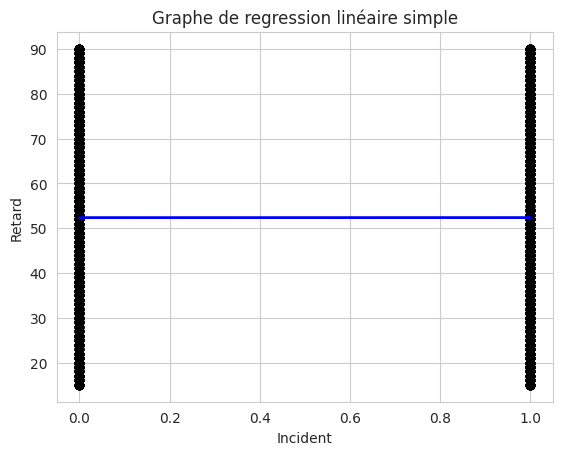

In [ ]:
#Display the results
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_train, model.predict(X_train), color='blue', linewidth=2)
plt.title('Graphe de regression linéaire simple')
plt.xlabel('Incident')
plt.ylabel('Retard')
plt.show()



>Regression linéaire multiple



**Prediction du risque de perte**

In [ ]:
X = Warehouses[['medium','Systèmes de sécurité', 'Industrial']] #features
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Building the model
model = LinearRegression()
#Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_pred

array([1.78615573, 1.99664383, 1.99664383, ..., 1.78615573, 1.99664383,
       1.99965397])

In [ ]:
y_test

259     1
4247    1
3087    2
1370    1
3428    1
       ..
1591    3
1765    3
1694    1
3373    3
4577    1
Name: degré de perte, Length: 1729, dtype: int64

In [ ]:
#The Mean Squared Error (MSE)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error (MSE):{mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean Squared Error (MSE):0.826 (42.4%)


In [ ]:
score= model.score(X_train, y_train)
print('Model determination:', score)

Model determination: 0.011146895822205183


In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R2) :", r2)

Coefficient de détermination (R2) : 0.012347514578794017


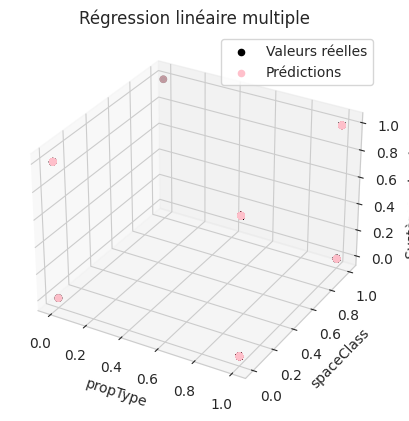

In [ ]:
import matplotlib.pyplot as plt

#Plot of real values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Industrial'], X_test['medium'], X_test['Systèmes de sécurité'], c='black', label='Valeurs réelles')

#Prediction Plot
ax.scatter(X_test['Industrial'], X_test['medium'], X_test['Systèmes de sécurité'], c='pink', label='Prédictions')

ax.set_xlabel('propType')
ax.set_ylabel('spaceClass')
ax.set_zlabel('Systèmes de sécurité')
ax.set_title('Régression linéaire multiple')
ax.legend()

#Display the results
plt.show()

**Prediction de coûts**

In [ ]:
X = Warehouses[['buildingSize','spaceAvailable','ceilingHeight']] #features
y = Warehouses['price']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Building the model
model = LinearRegression()
#Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_pred

array([0.79482445, 0.79534213, 0.7910842 , ..., 0.78961189, 0.79672747,
       0.72346414])

In [ ]:
y_test

5133    0.500
2496    0.900
5562    0.630
2392    0.925
8259    1.190
        ...  
4268    0.600
4365    0.710
3958    0.830
4698    1.080
3760    1.625
Name: price, Length: 1729, dtype: float64

In [ ]:
#Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({'Prix Réels': y_test, 'Prix Prédits': y_pred})

#Display the first rows of the DataFrame to visualize the comparison
print(comparison_df.tail())


      Prix Réels  Prix Prédits
4268       0.600      0.791136
4365       0.710      0.796279
3958       0.830      0.789612
4698       1.080      0.796727
3760       1.625      0.723464


In [ ]:
#The Mean Squared Error (MSE)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error (MSE):{mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean Squared Error (MSE):0.433 (57.4%)


In [ ]:
score= model.score(X_train, y_train)
print('Model determination:', score)

Model determination: 0.03627176115456543


In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R2) :", r2)

Coefficient de détermination (R2) : 0.05516511908830246


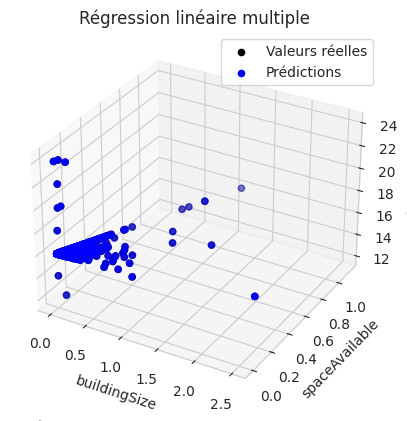

In [ ]:
#Plot of real values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['buildingSize'], X_test['spaceAvailable'], X_test['ceilingHeight'], c='black', label='Valeurs réelles')

#Prediction Plot
ax.scatter(X_test['buildingSize'], X_test['spaceAvailable'], X_test['ceilingHeight'], c='blue', label='Prédictions')

ax.set_xlabel('buildingSize')
ax.set_ylabel('spaceAvailable')
ax.set_zlabel('ceilingHeight')
ax.set_title('Régression linéaire multiple')
ax.legend()

#Display the results
plt.show()

**Prediction du risque de retard**

In [ ]:
X = Warehouses[['Incident','Disponible à la commande', 'degré de perte']] #features
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Building the model
model = LinearRegression()
#Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test)
y_pred

array([52.44714842, 52.21603211, 52.43412342, ..., 52.50140982,
       52.56869623, 52.28331851])

In [ ]:
y_test

7719    58
4722    25
248     35
7367    86
1199    74
        ..
6646    49
3502    21
1596    15
3148    47
1060    87
Name: retard, Length: 1729, dtype: int64

In [ ]:
#The Mean Squared Error (MSE)
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error (MSE):{mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')

Mean Squared Error (MSE):22.3 (42.6%)


In [ ]:
score= model.score(X_train, y_train)
print('Model determination:', score)

Model determination: 4.9627925977291376e-05


In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination (R2) :", r2)

Coefficient de détermination (R2) : -0.0007850652025997995


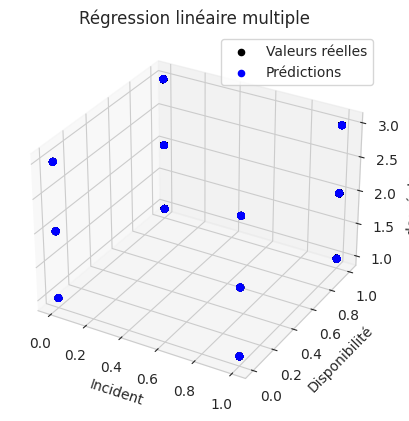

In [ ]:
#Plot of real values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Incident'], X_test['Disponible à la commande'], X_test['degré de perte'], c='black', label='Valeurs réelles')

#Prediction Plot
ax.scatter(X_test['Incident'], X_test['Disponible à la commande'], X_test['degré de perte'], c='blue', label='Prédictions')

ax.set_xlabel('Incident')
ax.set_ylabel('Disponibilité')
ax.set_zlabel('degré de perte')
ax.set_title('Régression linéaire multiple')
ax.legend()

#Display the results
plt.show()



> Regression logistique



**Prediction du risque de perte**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = Warehouses[['Systèmes de sécurité']] #feature
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Encoding
Warehouses['Systèmes de sécurité'].replace([0, 1], ['No', 'Yes'], inplace=True)
Warehouses.head()

,buildingSize,price,spaceAvailable,spaces,ceilingHeight,retard,degré de perte,Systèmes de sécurité,yearBuilt,yearRenovated,...,medium,small,Industrial,Land,Office,Retail,Specialty,Northeast,South,West
0,243072.0,0.440,243072,1,16,15,1,No,2020.0,2020.0,...,0,0,1,0,0,0,0,0,1,0
1,23000.0,0.665,21000,4,16,16,2,No,1995.0,1995.0,...,0,1,1,0,0,0,0,0,1,0
2,19764.0,0.310,19764,1,16,17,3,No,1977.0,1977.0,...,0,1,1,0,0,0,0,0,1,0
3,3600.0,0.630,3600,1,16,18,1,No,1968.0,1968.0,...,0,1,1,0,0,0,0,0,1,0
4,18000.0,1.500,18000,2,16,19,1,No,1943.0,1943.0,...,0,1,1,0,0,0,0,1,0,0


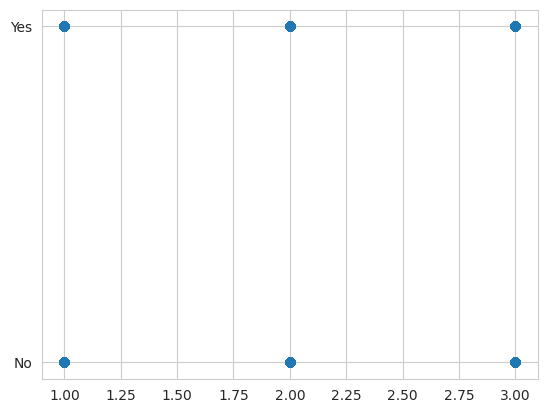

In [ ]:
#Create a scatter plot to visualize the relationship between 'degré de perte' and 'Systèmes de sécurité'
plt.scatter(Warehouses['degré de perte'], Warehouses['Systèmes de sécurité'])

In [ ]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [ ]:
#Apply one-hot encoding to categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['Systèmes de sécurité'])
X_test_encoded = pd.get_dummies(X_test, columns=['Systèmes de sécurité'])

In [ ]:
#Building the model
model = LogisticRegression()
#Train the model on the training set
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test_encoded)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3516483516483517


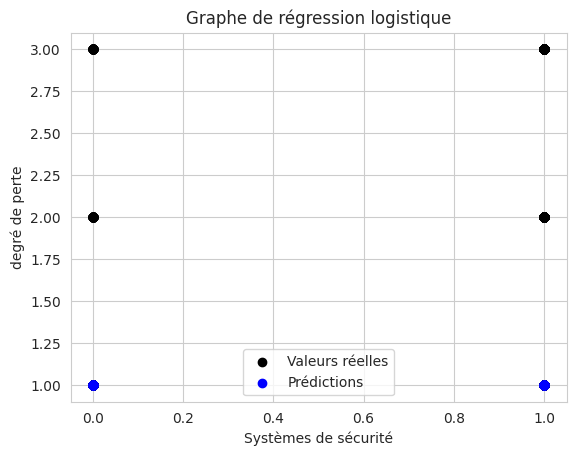

In [ ]:
#Display the results
plt.scatter(X_test['Systèmes de sécurité'], y_test, color='black', label='Valeurs réelles')
plt.scatter(X_test['Systèmes de sécurité'], y_pred, color='blue', label='Prédictions')


plt.xlabel('Systèmes de sécurité')
plt.ylabel('degré de perte')
plt.title('Graphe de régression logistique')

plt.legend()
plt.show()

**Prediction du risque de retard**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = Warehouses[['Incident']] #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

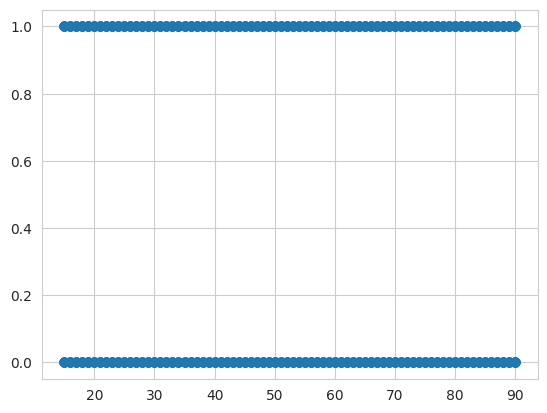

In [ ]:
#Create a scatter plot to visualize the relationship between 'retard' and 'Incident'
plt.scatter(Warehouses['retard'], Warehouses['Incident'])

In [ ]:
#Building the model
model = LogisticRegression()
#Train the model on the training set
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [ ]:
#Predictions
y_pred = model.predict(X_test_encoded)
y_pred

array([67, 67, 67, ..., 67, 67, 67])

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.010410641989589358


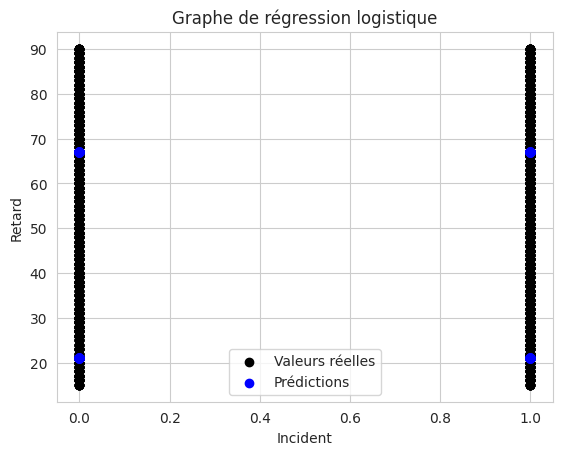

In [ ]:
#Display the results
plt.scatter(X_test['Incident'], y_test, color='black', label='Valeurs réelles')
plt.scatter(X_test['Incident'], y_pred, color='blue', label='Prédictions')


plt.xlabel('Incident')
plt.ylabel('Retard')
plt.title('Graphe de régression logistique')

plt.legend()
plt.show()



> Regression polynomiale



**Prediction du risque de perte**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = Warehouses[['Industrial']]  #feature
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

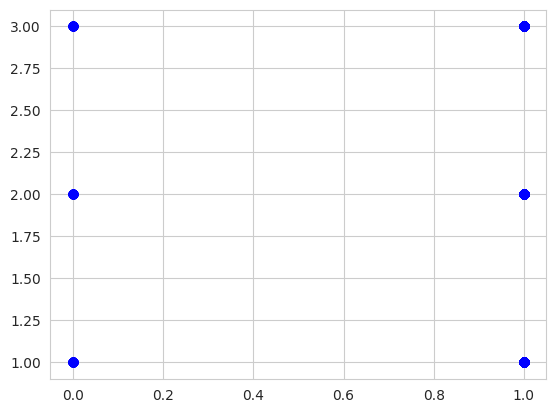

In [ ]:
#Scatter plot
plt.scatter(X, y, color='blue')

In [ ]:
#Create and train a simple linear regression model
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

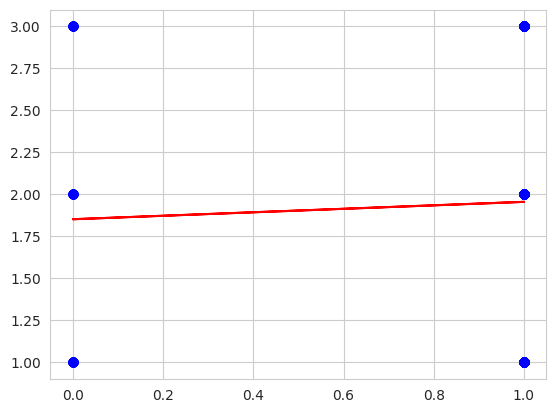

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

R-squared: 0.00033859225477905763


In [ ]:
#Create and train a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_poly_pred= regressor_poly.predict(X_poly)

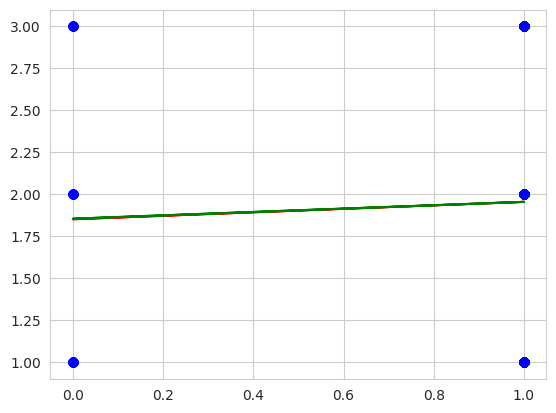

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.plot(X, regressor_poly.predict(X_poly), color= 'green')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_poly_pred)
print("R-squared:", r2)

R-squared: 0.00033825636511164436


In [ ]:
#Change of degree
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_poly_pred= regressor_poly.predict(X_poly)

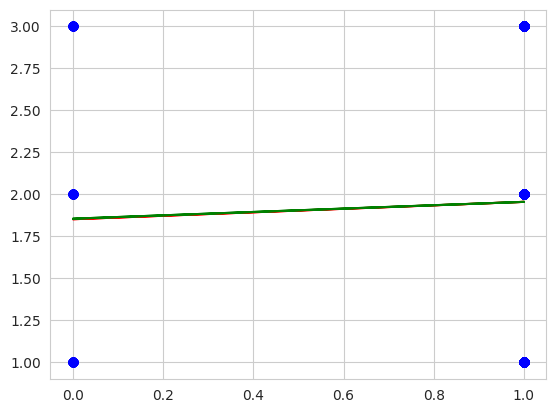

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.plot(X, regressor_poly.predict(X_poly), color= 'green')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_poly_pred)
print("R-squared:", r2)

R-squared: 0.0003382491543014732


In [ ]:
#Make a new prediction
predictions= poly_reg.fit_transform([[4]])
regressor_poly.predict(predictions)

array([-1.31593498e+14])

**Prediction de coûts**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = Warehouses[['buildingSize']]  #feature
y = Warehouses['price']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

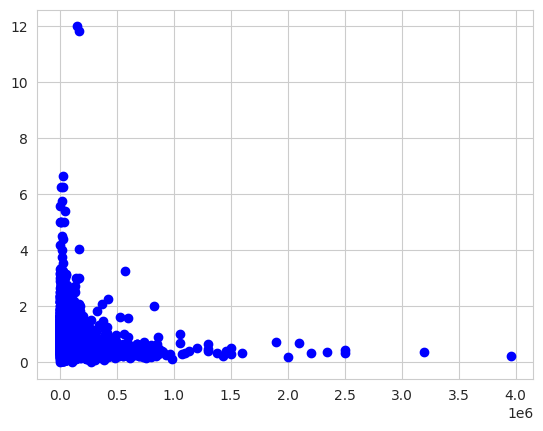

In [ ]:
#Scatter plot
plt.scatter(X, y, color='blue')

In [ ]:
#Create and train a simple linear regression model
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

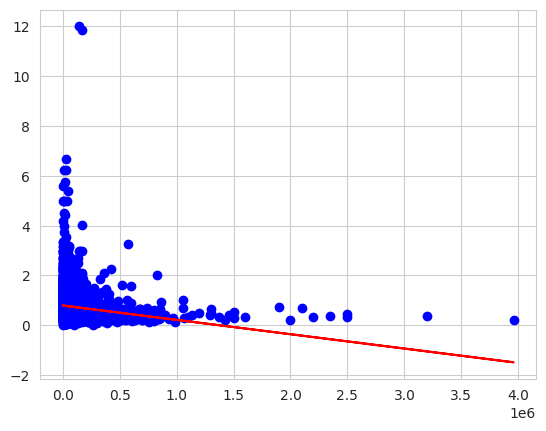

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

R-squared: 0.02451047512441562


In [ ]:
#Create and train a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_poly_pred= regressor_poly.predict(X_poly)

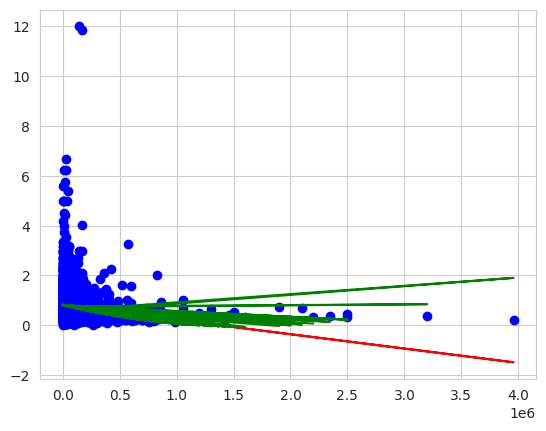

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.plot(X, regressor_poly.predict(X_poly), color= 'green')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_poly_pred)
print("R-squared:", r2)

R-squared: 0.03780911967548273


In [ ]:
#Make a new prediction
predictions= poly_reg.fit_transform([[30100]])
regressor_poly.predict(predictions)

array([0.78649643])

**Prediction du risque de retard**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = Warehouses[['Incident']]  #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

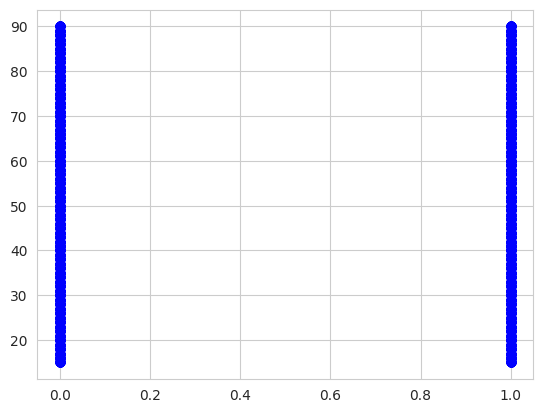

In [ ]:
#Scatter plot
plt.scatter(X, y, color='blue')

In [ ]:
#Create and train a simple linear regression model
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

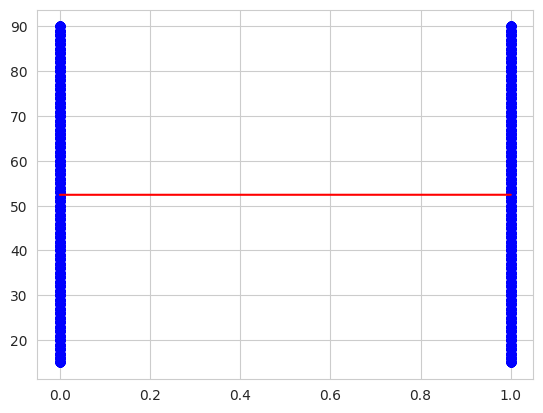

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

R-squared: 3.1170322767337666e-08


In [ ]:
#Create and train a polynomial regression model
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_poly_pred= regressor_poly.predict(X_poly)

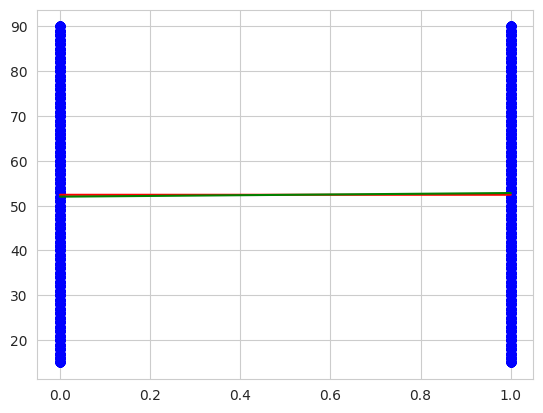

In [ ]:
#Display the results
plt.scatter(X, y, color='blue')
plt.plot(X, regressor.predict(X), color='red')
plt.plot(X, regressor_poly.predict(X_poly), color= 'green')

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y, y_poly_pred)
print("R-squared:", r2)

R-squared: -0.0003371742189435256


In [ ]:
#Make a new prediction
predictions= poly_reg.fit_transform([[0]])
regressor_poly.predict(predictions)

array([52.01130792])



> Regression Ridge



**Prediction du risque de perte**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X = Warehouses[['Industrial']]  #feature
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a simple linear regression model
L= LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred= L.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.00047253244488332236


In [ ]:
#Create and train a ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
#Predictions
y_pred1= ridge.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred1)
print("R-squared:", r2)  #Similaire a lineaire Regression

R-squared: 0.00047167015342552965


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.6951498140624667


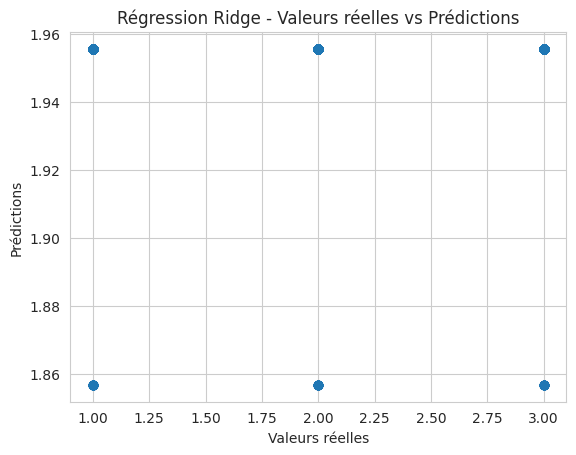

In [ ]:
#Display the results
plt.scatter(y_test, y_pred1)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Ridge - Valeurs réelles vs Prédictions")
plt.show()

**Prediction de coûts**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X = Warehouses[['buildingSize']]  #feature
y = Warehouses['price']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a simple linear regression model
L= LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred= L.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.03208012525957238


In [ ]:
#Create and train a ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
#Predictions
y_pred1= ridge.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred1)
print("R-squared:", r2)  #Similaire a lineaire Regression

R-squared: 0.03208012525957227


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.1945908608827433


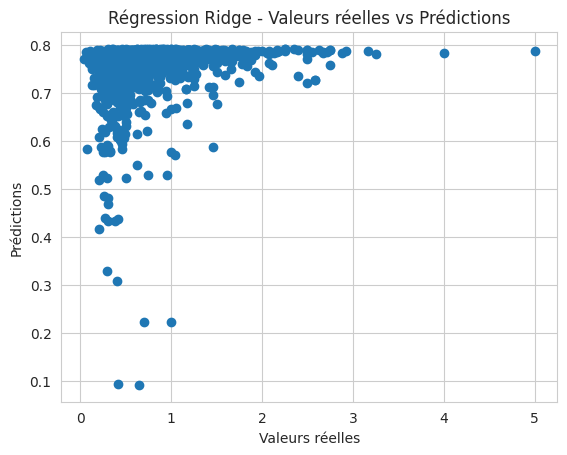

In [ ]:
#Display the results
plt.scatter(y_test, y_pred1)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Ridge - Valeurs réelles vs Prédictions")
plt.show()

**Prediction du risque de retard**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
X = Warehouses[['Incident']]  #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a simple linear regression model
L= LinearRegression()
L.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predictions
y_pred= L.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -0.001281677379730839


In [ ]:
#Create and train a ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
#Predictions
y_pred1= ridge.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred1)
print("R-squared:", r2)  #Similaire a lineaire Regression

R-squared: -0.001281574402971053


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 474.8245759956223


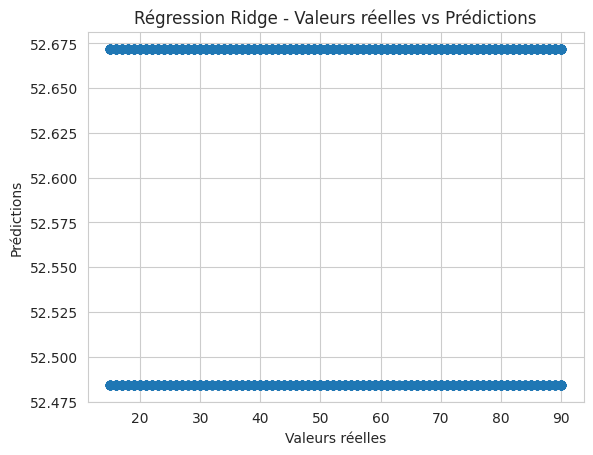

In [ ]:
#Display the results
plt.scatter(y_test, y_pred1)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Ridge - Valeurs réelles vs Prédictions")
plt.show()



> Regression Lasso



**Prediction du risque de perte**




In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X = Warehouses[['Industrial']]  #feature
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
#Predictions
y_pred2 = lasso.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred2)
print("R-squared:", r2)

R-squared: -0.0013336218947574974


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.6863767477952042


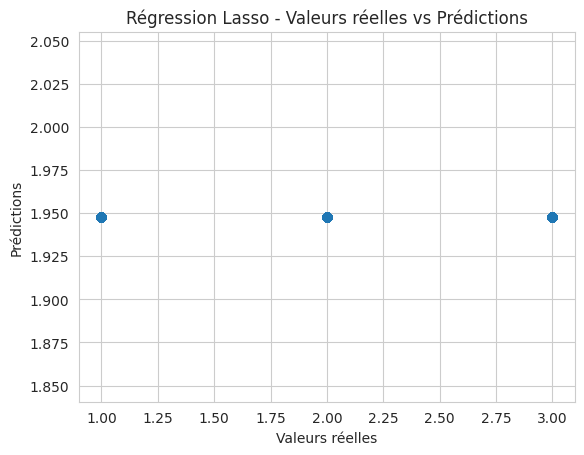

In [ ]:
#Display the results
plt.scatter(y_test, y_pred2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Lasso - Valeurs réelles vs Prédictions")
plt.show()

**Prediction de coûts**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X = Warehouses[['buildingSize']]  #feature
y = Warehouses['price']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
#Predictions
y_pred2 = lasso.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred2)
print("R-squared:", r2)

R-squared: 0.022812845966807216


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.20904569439135115


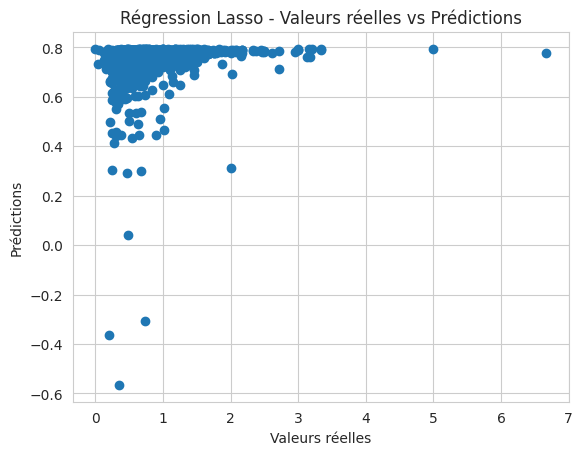

In [ ]:
#Display the results
plt.scatter(y_test, y_pred2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Lasso - Valeurs réelles vs Prédictions")
plt.show()

**Prediction du risque de retard**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
X = Warehouses[['Incident']]  #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a lasso regression model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
#Predictions
y_pred2 = lasso.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred2)
print("R-squared:", r2)

R-squared: -0.0008919020308073566


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 482.60351469033606


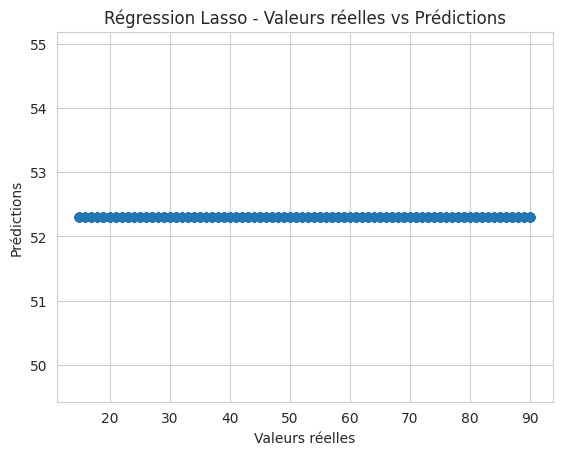

In [ ]:
#Display the results
plt.scatter(y_test, y_pred2)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Lasso - Valeurs réelles vs Prédictions")
plt.show()


> Elastic Net



**Prediction du risque de perte**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
X = Warehouses[['Industrial']]  #feature
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a ElasticNet regression model
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet()

In [ ]:
#Predictions
y_pred3 = enet.predict(X_test)

In [ ]:
y_pred3

array([1.95342783, 1.95342783, 1.95342783, ..., 1.95342783, 1.95342783,
       1.95342783])

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred3)
print("R-squared:", r2)

R-squared: -6.180948420198007e-06


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred3)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.6718207228524816


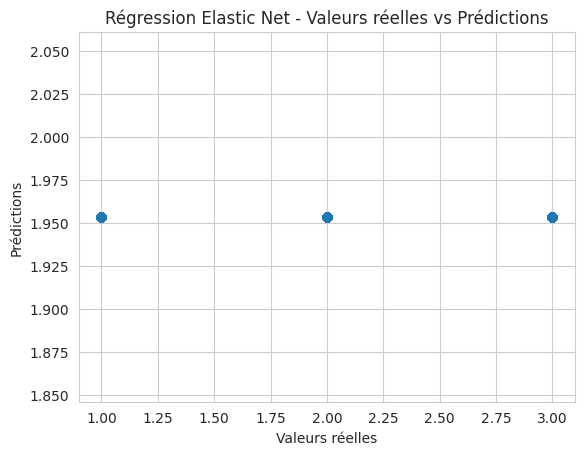

In [ ]:
#Display the results
plt.scatter(y_test, y_pred3)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Elastic Net - Valeurs réelles vs Prédictions")
plt.show()

**Prediction de coûts**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
X = Warehouses[['buildingSize']]  #feature
y = Warehouses['price']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a ElasticNet regression model
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet()

In [ ]:
#Predictions
y_pred3 = enet.predict(X_test)

In [ ]:
y_pred3

array([0.7526636 , 0.77031865, 0.75342294, ..., 0.77698734, 0.78124141,
       0.78170984])

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred3)
print("R-squared:", r2)

R-squared: 0.023424301572276707


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred3)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.2829967398474127


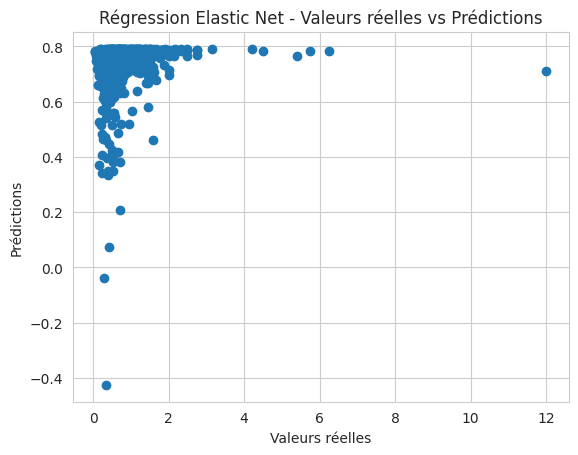

In [ ]:
#Display the results
plt.scatter(y_test, y_pred3)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Elastic Net - Valeurs réelles vs Prédictions")
plt.show()

**Prediction du risque de retard**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
X = Warehouses[['Incident']]  #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a ElasticNet regression model
enet = ElasticNet(alpha=1.0, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet()

In [ ]:
#Predictions
y_pred3 = enet.predict(X_test)

In [ ]:
y_pred3

array([52.54845242, 52.54845242, 52.54845242, ..., 52.54845242,
       52.54845242, 52.54845242])

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred3)
print("R-squared:", r2)

R-squared: -0.0006824509600436013


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred3)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 486.84715715540324


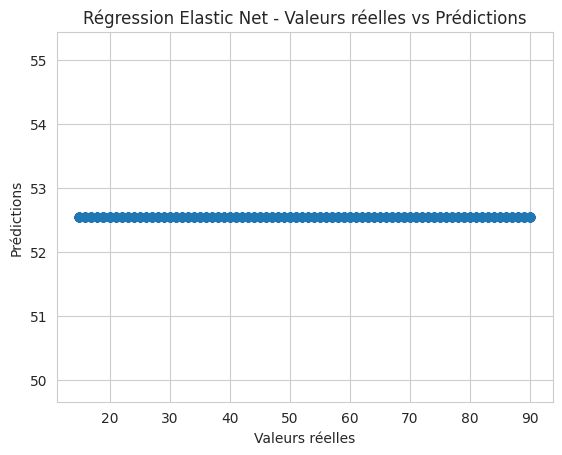

In [ ]:
#Display the results
plt.scatter(y_test, y_pred3)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Elastic Net - Valeurs réelles vs Prédictions")
plt.show()


> Régression linéaire bayésienne



**Prediction du risque de perte**

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
X = Warehouses[['Industrial']]  #feature
y = Warehouses['degré de perte']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a BayesianRidge regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

BayesianRidge()

In [ ]:
#Predictions
y_pred4 = bayesian_ridge.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred4)
print("R-squared:", r2)

R-squared: -0.0036246675220479307


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred4)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.6715054664017718


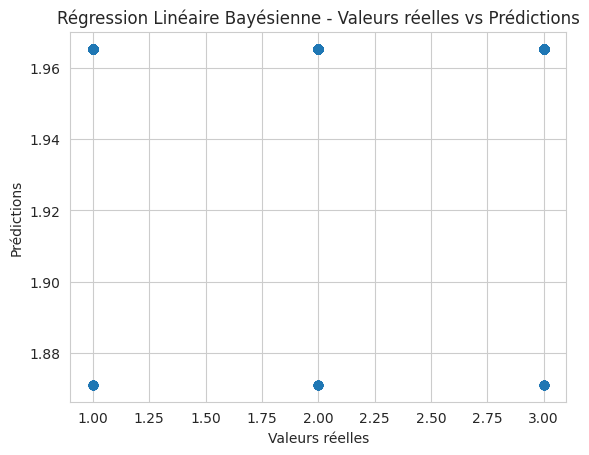

In [ ]:
#Display the results
plt.scatter(y_test, y_pred4)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire Bayésienne - Valeurs réelles vs Prédictions")
plt.show()

**Prediction de coûts**

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
X = Warehouses[['buildingSize']]  #feature
y = Warehouses['price']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a BayesianRidge regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

BayesianRidge()

In [ ]:
#Predictions
y_pred4 = bayesian_ridge.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred4)
print("R-squared:", r2)

R-squared: 0.027451349567839345


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred4)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 0.25649552739394416


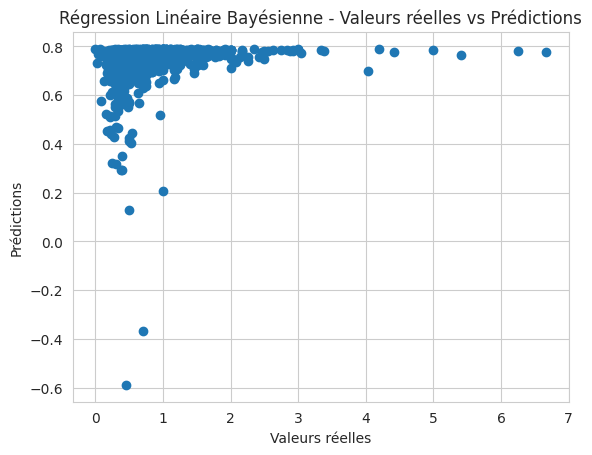

In [ ]:
#Display the results
plt.scatter(y_test, y_pred4)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire Bayésienne - Valeurs réelles vs Prédictions")
plt.show()

**Prediction du risque de retard**

In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
X = Warehouses[['Incident']]  #feature
y = Warehouses['retard']  #target

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Create and train a BayesianRidge regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

BayesianRidge()

In [ ]:
#Predictions
y_pred4 = bayesian_ridge.predict(X_test)

In [ ]:
#The coefficient of determination or R-squared
r2 = r2_score(y_test, y_pred4)
print("R-squared:", r2)

R-squared: -8.933983530745593e-06


In [ ]:
#The Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred4)
print(f'Erreur quadratique moyenne (MSE): {mse}')

Erreur quadratique moyenne (MSE): 474.34680482386057


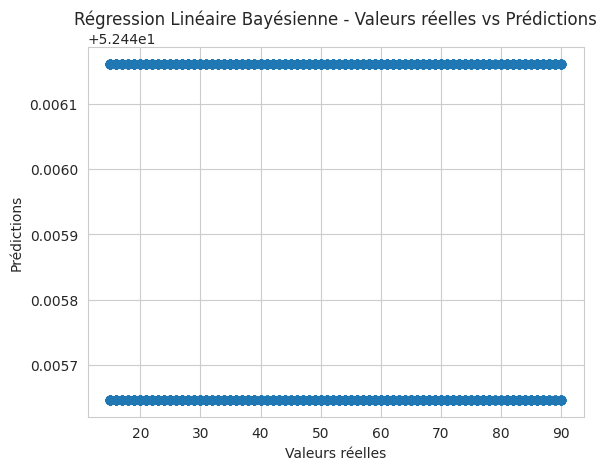

In [ ]:
#Display the results
plt.scatter(y_test, y_pred4)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Régression Linéaire Bayésienne - Valeurs réelles vs Prédictions")
plt.show()